**Residential Property Price Prediction: An Integrated Approach using Machine Learning and Optimization Modeling**

**Setting Up Optimization and Machine Learning with Gurobi and Decision Tree Regressor**

In [1]:
!pip install gurobipy
%pip install gurobipy_pandas
%pip install gurobi-machinelearning
import gurobipy as gp
import gurobipy_pandas as gppd
from gurobipy import GRB
from gurobi_ml import add_predictor_constr
import pandas as pd
import warnings
import numpy as np
from sklearn.tree import DecisionTreeRegressor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.6 MB/s eta 0:00:00


**Initializing Gurobi Environment with WLS License Parameters**

In [2]:
# Create an environment with your WLS license
params = {
"WLSACCESSID": '545ea438-2072-4ced-911f-c63121e8f7b6',
"WLSSECRET": 'db6505c8-da5a-40e7-bec8-41f2218cc665',
"LICENSEID": 2447773,
}
env = gp.Env(params=params)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2447773
Academic license 2447773 - for non-commercial use only - registered to de___@colorado.edu


**Exploratory Data Analysis: Correlation Heatmap for Melbourne Housing Features**

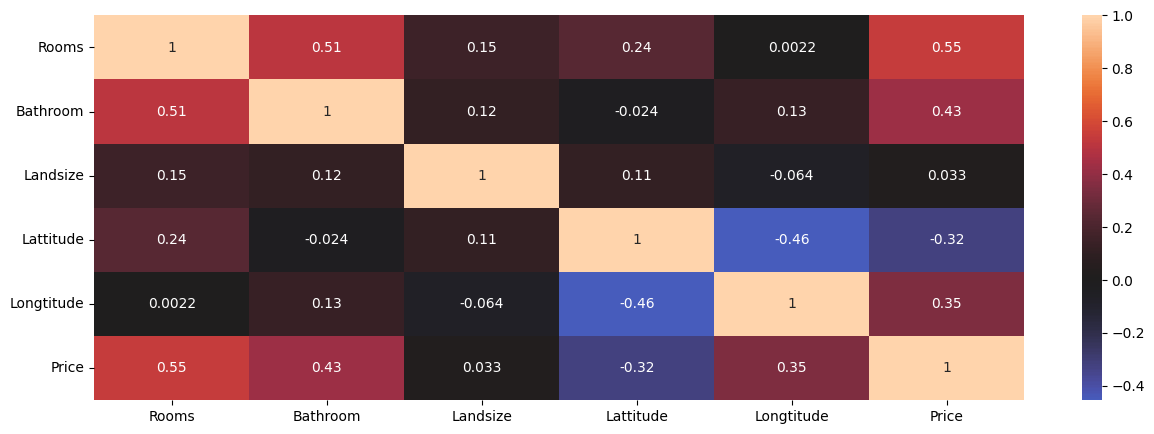

In [3]:
%pip install seaborn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
melbourne_data_full = pd.read_csv('/content/north.csv')
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

X = melbourne_data_full[melbourne_features]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.heatmap(melbourne_data_full[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Price']].corr(),annot=True, center=0,ax=axes)
#hm = sn.heatmap(data = X)

# displaying the plotted heatmap
plt.show()

**Data Preparation and Initial Exploration for Melbourne Housing Dataset**

In [4]:
melbourne_data = pd.read_csv('/content/north.csv')

#cleans the data if there is any missing values in the rows
melbourne_data = melbourne_data.dropna(axis=0).reset_index(drop=True)

# stores the Price value
y = melbourne_data.Price

# list of features
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

# converts list of features to dataframe
X = melbourne_data[melbourne_features]

# statistical summary / display first five rows of data
X.describe()
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
0,2,1,156,-37.8079,144.9934
1,3,2,134,-37.8093,144.9944
2,4,1,120,-37.8072,144.9941
3,3,2,245,-37.8024,144.9993
4,2,1,256,-37.8060,144.9954


**Decision Tree Regression Model Training and Evaluation for Melbourne Housing Prices**

In [5]:
from sklearn.tree import DecisionTreeRegressor

melbourne_model = DecisionTreeRegressor(random_state=0)

# Train/Fit model
melbourne_model.fit(X, y)
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

# to measure accuracy of the regression model
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)

# to determine the accuracy
mean_absolute_error(y, predicted_home_prices)

# split dataset into training and testing set
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# OneHotEncoder - converts the categorical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

# retrained the model on the training set
melbourne_model.fit(train_X, train_y)

# prediction on the test/validation set
y_pred = melbourne_model.predict(val_X)

# calculate the R squared score
from sklearn.metrics import r2_score
value1 = np.round(r2_score(val_y, y_pred))
print(value1)

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2         1       156   -37.8079    144.9934
1      3         2       134   -37.8093    144.9944
2      4         1       120   -37.8072    144.9941
3      3         2       245   -37.8024    144.9993
4      2         1       256   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]
1.0


**Integrating and Displaying Predictions in the Validation Dataset**

In [6]:
# Prediction on the validation dataset
val_predictions = melbourne_model.predict(val_X)

# Displaying the predictions
print("Predictions on the validation data:")
print(val_predictions)

Predictions on the validation data:
[1030000. 1095000.  521500.  265000.  601000.  646000.  765000. 1075000.
 1205000.  860000.  440000.  921500. 2000000.  763000. 1271000.  700000.
  860000. 1008000.  730000.  598000. 1300000.  358500.  265000. 1650000.
  451000. 1950000.  825000. 1075000.  285000. 1326000.  745000.  641000.
  710000.  822000.  825000. 1581000.  420500.  950000. 2175000. 1290000.
 1581000.  820000. 1045000. 1300000.  600000.  601000.  610000.  370000.
  807000. 1155000.  850000.  440000.  370000. 1260000.  407500. 1260000.
 1370000.  680000.  860000. 1165000.  765000.  700000.  600000. 1105000.
  505000.  407500. 1200000.  521500. 1875000.  800000.  765000.  784000.
  921500.  537000.  820000.  985000. 1150000.  822000.  784000.  935000.
 1290000.  610000. 1326000. 2718000. 1210000.  700000.  772000. 1209000.
  672000. 1000000.  550000.  540000.  703000. 1581000. 1160000.  700000.
  885500. 1037000.  745000.  921500.  850000.  700000. 4011000.  625000.
  711500. 11350

**Model 1: Linear Regression Model Optimization using Gurobi Solver**

In [7]:
# Initialize Gurobi
df = train_X
m1 = gp.Model(env=env)

# 1. Specify decisions
room_weight = m1.addVar(name="w_room", lb=0)
bath_weight = m1.addVar(name="w_bath", lb=0)
landsize_weight = m1.addVar(name="w_ls", lb=0)
lattitude_weight = m1.addVar(name="w_lat", lb=0)
longtitude_weight = m1.addVar (name ="w_lon", lb=0)
intercept_weight = m1.addVar(name="w_int", lb=0)

o = m1.addVars(df.index, name="over")
u = m1.addVars(df.index, name="under")

# 2. Specify objective
objective_expr = (gp.quicksum(o[i] for i in df.index) +
                  gp.quicksum(u[i] for i in df.index)
)
m1.setObjective(objective_expr, gp.GRB.MINIMIZE)

# 3. Specify constraints
for i in df.index:
    lhs = df['Rooms'][i] * room_weight
    lhs += df['Bathroom'][i] * bath_weight
    lhs += df['Landsize'][i] * landsize_weight
    lhs += df['Lattitude'][i]* lattitude_weight
    lhs += df['Longtitude'][i]* longtitude_weight
    lhs += intercept_weight

    # Add constraint
    m1.addConstr(lhs == train_y[i] + o[i] - u[i], f"cnst_{i}")

**Executing and Analyzing the Gurobi Linear Regression Model Optimization Results**

In [8]:
# Perform optimization
m1.optimize()

print(f"objective value: {m1.objVal}")

print(f"room_weight : {room_weight.X}")
print(f"bath_weight : {bath_weight.X}")
print(f"landsize_weight : {landsize_weight.X}")
print(f"latitude_weight : {lattitude_weight.X}")
print(f"longtitude_weight : {longtitude_weight.X}")
print(f"intercept : {intercept_weight.X}")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2447773 - for non-commercial use only - registered to de___@colorado.edu
Optimize a model with 392 rows, 790 columns and 3051 nonzeros
Model fingerprint: 0x21d5cc4a
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+05, 4e+06]
Presolve time: 0.04s
Presolved: 392 rows, 790 columns, 3051 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.234281e+07   0.000000e+00      0s
     678    1.1307592e+08   0.000000e+00   0.000000e+00      0s

Solved in 678 iterations and 0.17 seconds (0.02 work units)
Optimal objective  1.130759209e+08
objective value: 113075920.90485606
room_weight : 234984.16239879

**Comparison of Model Performance through MAE and R²: Decision Tree Regressor vs Gurobi Optimized Linear Regression**

In [9]:
# Make predictions and evaluate the Decision Tree Regressor
dt_predictions = melbourne_model.predict(val_X)
dt_mae = mean_absolute_error(val_y, dt_predictions)
dt_r2 = r2_score(val_y, dt_predictions)

# Predictions using Gurobi optimization weights
# Assuming room_weight, bath_weight, landsize_weight, latitude_weight, intercept_weight are available
gurobi_predictions = (val_X['Rooms'] * room_weight.X +
                      val_X['Bathroom'] * bath_weight.X +
                      val_X['Landsize'] * landsize_weight.X +
                      val_X['Lattitude'] * lattitude_weight.X +
                      val_X['Longtitude'] * longtitude_weight.X +
                      intercept_weight.X)

# Step 3: Compare the two sets of predictions
# Convert gurobi_predictions to a NumPy array if it isn't already one
gurobi_predictions = np.array(gurobi_predictions)

# Evaluate the Gurobi model
gurobi_mae = mean_absolute_error(val_y, gurobi_predictions)
gurobi_r2 = r2_score(val_y, gurobi_predictions)

# Compare the models
print(f"Decision Tree - MAE: {dt_mae}, R²: {dt_r2}")
print(f"Gurobi Optimization - MAE: {gurobi_mae}, R²: {gurobi_r2}")

Decision Tree - MAE: 185235.57251908397, R²: 0.6583149425599956
Gurobi Optimization - MAE: 282595.99930222536, R²: 0.2926115482753421


**Model 2: Linear Regression Model Optimization using Gurobi Solver**

In [10]:
# Initialize Gurobi with model name 'm2'
m2 = gp.Model()

# Specify decisions with non-negativity constraints
room_weight = m2.addVar(name="w_room", lb=0)
bath_weight = m2.addVar(name="w_bath", lb=0)
landsize_weight = m2.addVar(name="w_ls", lb=0)
lattitude_weight = m2.addVar(name="w_lat", lb=0)
longtitude_weight = m2.addVar(name="w_lon", lb=0)
intercept_weight = m2.addVar(name="w_int", lb=0)

# Create variables for over- and under-estimation
o = m2.addVars(len(train_X), name="over")
u = m2.addVars(len(train_X), name="under")

# Set the objective function to minimize the sum of over- and under-estimation variables
objective_expr = (gp.quicksum(o[i] for i in range(len(train_X))) +
                  gp.quicksum(u[i] for i in range(len(train_X))))
m2.setObjective(objective_expr, gp.GRB.MINIMIZE)

# Add constraints for each data point in the training set
for i in range(len(train_X)):
    lhs = (train_X.iloc[i]['Rooms'] * room_weight +
           train_X.iloc[i]['Bathroom'] * bath_weight +
           train_X.iloc[i]['Landsize'] * landsize_weight +
           train_X.iloc[i]['Lattitude'] * lattitude_weight +
           train_X.iloc[i]['Longtitude'] * longtitude_weight +
           intercept_weight)
    m2.addConstr(lhs  == train_y.iloc[i]+ o[i] - u[i], f"cnst_{i}")

# Add new constraints for the updated model
m2.addConstr(room_weight <= bath_weight, "bath_more_than_room")

# Optimize the model 'm2'
m2.optimize()

# Check the optimal value after adding the new constraints
if m2.status == gp.GRB.Status.OPTIMAL:
    print(f"New Optimal Objective Value: {m2.objVal}")

    # Extract variable values from the model
    room_weight_val = room_weight.X
    bath_weight_val = bath_weight.X
    landsize_weight_val = landsize_weight.X
    lattitude_weight_val = lattitude_weight.X
    longtitude_weight_val = longtitude_weight.X
    intercept_weight_val = intercept_weight.X

    # Evaluate performance of the optimized model 'm2' on the validation set
    optimized_predictions_m2 = [val_X.loc[idx]['Rooms'] * room_weight_val +
                                val_X.loc[idx]['Bathroom'] * bath_weight_val +
                                val_X.loc[idx]['Landsize'] * landsize_weight_val +
                                val_X.loc[idx]['Lattitude'] * lattitude_weight_val +
                                val_X.loc[idx]['Longtitude'] * longtitude_weight_val +
                                intercept_weight_val for idx in val_X.index]
    optimized_predictions_m2 = pd.Series(optimized_predictions_m2, index=val_y.index)
    optimized_mae_m2 = mean_absolute_error(val_y, optimized_predictions_m2)
    optimized_r2_m2 = r2_score(val_y, optimized_predictions_m2)
    print(f"Optimized Model m2 - MAE: {optimized_mae_m2}, R²: {optimized_r2_m2}")
else:
    print("Optimization was not successful for model 'm2'.")

# Evaluate performance of the Decision Tree model
dt_predictions = melbourne_model.predict(val_X)
dt_mae = mean_absolute_error(val_y, dt_predictions)
dt_r2 = r2_score(val_y, dt_predictions)
print(f"Decision Tree Model - MAE: {dt_mae}, R²: {dt_r2}")

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 393 rows, 790 columns and 3053 nonzeros
Model fingerprint: 0x8610a1f8
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+05, 4e+06]
Presolve time: 0.01s
Presolved: 393 rows, 790 columns, 3053 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.234281e+07   0.000000e+00      0s
     678    1.1422871e+08   0.000000e+00   0.000000e+00      0s

Solved in 678 iterations and 0.05 seconds (0.02 work units)
Optimal objective  1.142287084e+08
New Optimal Objective Value: 114228708.3998375
Optimized Model m2 - MAE: 281674.33542

**Model 3: Linear Regression Model Optimization using Gurobi Solver**

In [11]:
# Initialize Gurobi
m3 = gp.Model(env=env)

# 1. Specify decisions
room_weight_more_than_4 = m3.addVar(name="w_room_more_4")
room_weight_4_or_less = m3.addVar(name="w_room_4_or_less")
bath_weight_more_than_2 = m3.addVar(name="w_bath_more_2")
bath_weight_2_or_less = m3.addVar(name="w_bath_2_or_less")
landsize_weight_more_than_2338 = m3.addVar(name="w_ls_more_2338")
landsize_weight_2338_or_less = m3.addVar(name="w_ls_2338_or_less")
lattitude_weight_above_37_752 = m3.addVar(name="w_lat_above_37_752")
lattitude_weight_below_37_752 = m3.addVar(name="w_lat_below_37_752")
longtitude_weight_above_144_9686 = m3.addVar(name="w_lon_above_144_9686")
longtitude_weight_below_144_9686 = m3.addVar(name="w_lon_below_144_9686")
intercept_weight = m3.addVar(name="w_int")

o = m3.addVars(df.index, name="over")
u = m3.addVars(df.index, name="under")

# 2. Specify objective
objective_expr = (gp.quicksum(o[i] for i in df.index) + gp.quicksum(u[i] for i in df.index))
m3.setObjective(objective_expr, GRB.MINIMIZE)

# 3. Specify constraints
for i in df.index:
    bath_weight = bath_weight_more_than_2 if df['Bathroom'][i] > 2 else bath_weight_2_or_less
    room_weight = room_weight_more_than_4 if df['Rooms'][i] > 4 else room_weight_4_or_less
    landsize_weight = landsize_weight_more_than_2338 if df['Landsize'][i] > 2338 else landsize_weight_2338_or_less
    lattitude_weight = lattitude_weight_above_37_752 if df['Lattitude'][i] > -37.752 else lattitude_weight_below_37_752
    longtitude_weight = longtitude_weight_above_144_9686 if df['Longtitude'][i] > 144.9686 else longtitude_weight_below_144_9686

    lhs = (room_weight * df['Rooms'][i] +
           bath_weight * df['Bathroom'][i] +
           landsize_weight * df['Landsize'][i] +
           lattitude_weight * df['Lattitude'][i] +
           longtitude_weight * df['Longtitude'][i] +
           intercept_weight)

    # Add constraint
    m3.addConstr(lhs == train_y[i] + o[i] - u[i], f"cnst_{i}")

# Perform optimization
m3.optimize()

# Print optimized variable values
print(f"Objective Value: {m3.objVal}")
print(f"Room Weight (More than 4): {room_weight_more_than_4.X}")
print(f"Room Weight (4 or Less): {room_weight_4_or_less.X}")
print(f"Bathroom Weight (More than 2): {bath_weight_more_than_2.X}")
print(f"Bathroom Weight (2 or Less): {bath_weight_2_or_less.X}")
print(f"Landsize Weight (More than 2338): {landsize_weight_more_than_2338.X}")
print(f"Landsize Weight (2338 or Less): {landsize_weight_2338_or_less.X}")
print(f"Lattitude Weight (Above -37.752): {lattitude_weight_above_37_752.X}")
print(f"Lattitude Weight (Below -37.752): {lattitude_weight_below_37_752.X}")
print(f"Longtitude Weight (Above 144.9686): {longtitude_weight_above_144_9686.X}")
print(f"Longtitude Weight (Below 144.9686): {longtitude_weight_below_144_9686.X}")
print(f"Intercept: {intercept_weight.X}")

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Academic license 2447773 - for non-commercial use only - registered to de___@colorado.edu
Optimize a model with 392 rows, 795 columns and 3051 nonzeros
Model fingerprint: 0xfcd74eb2
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+05, 4e+06]
Presolve time: 0.01s
Presolved: 392 rows, 795 columns, 3051 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.228027e+07   0.000000e+00      0s
     466    9.2972037e+07   0.000000e+00   0.000000e+00      0s

Solved in 466 iterations and 0.05 seconds (0.01 work units)
Optimal objective  9.297203670e+07
Objective Value: 92972036.70469666
Room Weight (More than 4): 196


**Assessing the Performance of Gurobi-Optimized Residential Property Price Model: MAE and R² Evaluation on Validation Set**

In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

# Predict prices using the optimized model for the validation set
predicted_prices_val = []
for i in val_X.index:
    predicted_price_val = (
        val_X.loc[i, 'Rooms'] * (room_weight_more_than_4.X if val_X.loc[i, 'Rooms'] > 4 else room_weight_4_or_less.X) +
        val_X.loc[i, 'Bathroom'] * (bath_weight_more_than_2.X if val_X.loc[i, 'Bathroom'] > 2 else bath_weight_2_or_less.X) +
        val_X.loc[i, 'Landsize'] * (landsize_weight_more_than_2338.X if val_X.loc[i, 'Landsize'] > 2338 else landsize_weight_2338_or_less.X) +
        val_X.loc[i, 'Lattitude'] * (lattitude_weight_above_37_752.X if val_X.loc[i, 'Lattitude'] > -37.752 else lattitude_weight_below_37_752.X) +
        val_X.loc[i, 'Longtitude'] * (longtitude_weight_above_144_9686.X if val_X.loc[i, 'Longtitude'] > 144.9686 else longtitude_weight_below_144_9686.X) +
        intercept_weight.X
    )
    predicted_prices_val.append(predicted_price_val)

predicted_prices_val = np.array(predicted_prices_val)

# Calculate MAE and R² for the validation set
mae_val = mean_absolute_error(val_y, predicted_prices_val)
r_squared_val = r2_score(val_y, predicted_prices_val)

print(f"Mean Absolute Error (MAE) on Validation Set: {mae_val}")
print(f"R-squared (R²) on Validation Set: {r_squared_val}")

Mean Absolute Error (MAE) on Validation Set: 244288.59306652332
R-squared (R²) on Validation Set: 0.5372029625549789


**Plotting Error Distributions for Decision Tree and Gurobi Optimized Regression Models**

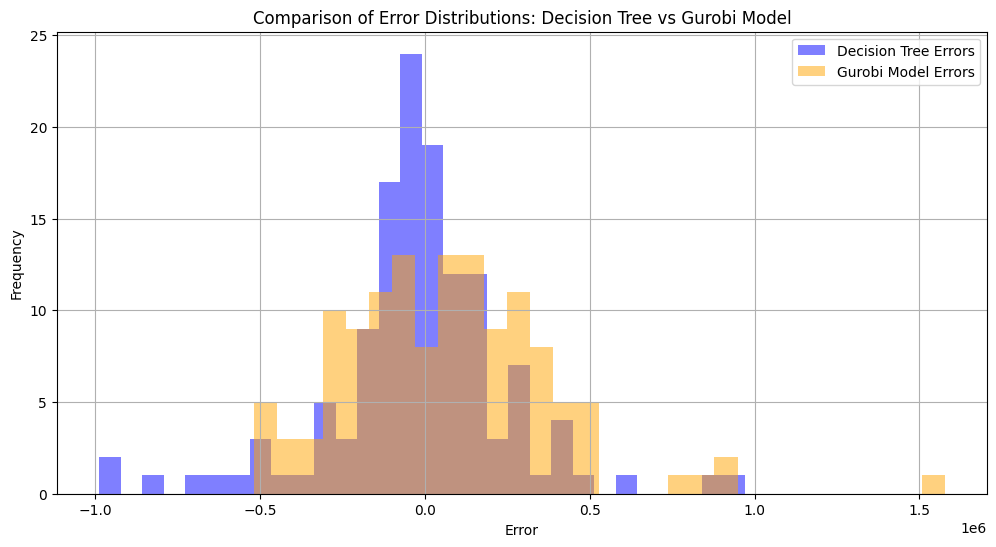

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Assuming that the dataset and necessary variables are already loaded and available

# Train the Decision Tree Regressor and make predictions
melbourne_model = DecisionTreeRegressor(random_state=0)
melbourne_model.fit(train_X, train_y)
dt_predictions = melbourne_model.predict(val_X)

# Calculate errors for Decision Tree Regressor
dt_errors = val_y - dt_predictions

# Predictions using Gurobi optimization weights
# Replace these values with the actual weights obtained from your Gurobi model
room_weight_value_more_4 = 196437.94538957148  # replace with actual value
room_weight_value_4_or_less = 289229.1449076131  # replace with actual value
bath_weight_value_more_2 = 70959.42755556254  # replace with actual value
bath_weight_value_2_or_less = 45620.814746083066  # replace with actual value
landsize_weight_value_more_2338 = 0  # replace with actual value
landsize_weight_value_2338_or_less = 201.21458563606473  # replace with actual value
lattitude_weight_value_above_37_752 = 8837.19080904186  # replace with actual value
lattitude_weight_value_below_37_752 = 0  # replace with actual value
longtitude_weight_value_above_144_9686 = 1553.420414183361  # replace with actual value
longtitude_weight_value_below_144_9686 = 105.54385629422791  # replace with actual value
intercept_weight_value = 0  # replace with actual value

gurobi_predictions = (val_X.apply(lambda row: (room_weight_value_more_4 if row['Rooms'] > 4 else room_weight_value_4_or_less) * row['Rooms'] +
                                  (bath_weight_value_more_2 if row['Bathroom'] > 2 else bath_weight_value_2_or_less) * row['Bathroom'] +
                                  (landsize_weight_value_more_2338 if row['Landsize'] > 2338 else landsize_weight_value_2338_or_less) * row['Landsize'] +
                                  (lattitude_weight_value_above_37_752 if row['Lattitude'] > -37.752 else lattitude_weight_value_below_37_752) * row['Lattitude'] +
                                  (longtitude_weight_value_above_144_9686 if row['Longtitude'] > 144.9686 else longtitude_weight_value_below_144_9686) * row['Longtitude'] +
                                  intercept_weight_value, axis=1))

# Calculate errors for Gurobi model
gurobi_errors = val_y - gurobi_predictions

# Plotting the histograms
plt.figure(figsize=(12, 6))

plt.hist(dt_errors, bins=30, alpha=0.5, label='Decision Tree Errors', color='blue')
plt.hist(gurobi_errors, bins=30, alpha=0.5, label='Gurobi Model Errors', color='orange')

plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Comparison of Error Distributions: Decision Tree vs Gurobi Model')
plt.legend()
plt.grid(True)
plt.show()


**Analyzing Predictive Accuracy and Visualizing Price Estimations: Decision Tree and Gurobi Models**

Decision Tree Regressor MAE: 185235.57251908397
Gurobi Optimization Model MAE: 244288.59306652332
Average Actual Price: 950691.145038168
Average ML Predicted Price: 970690.8396946564
Average Optimization Predicted Price: 882912.4862776746


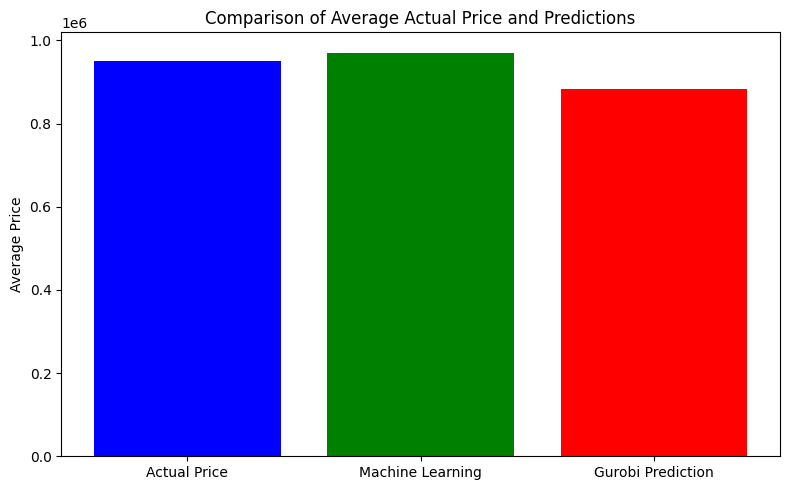

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

# Assuming the Decision Tree model (melbourne_model) and data (train_X, train_y, val_X, val_y) are already defined and loaded

# Train the Decision Tree Regressor and make predictions
melbourne_model.fit(train_X, train_y)
dtree_predictions = melbourne_model.predict(val_X)

# Gurobi Predictions using the weights from the Gurobi optimization model
# Replace these with the actual weights from your Gurobi model
gurobi_predictions = (val_X.apply(lambda row: (room_weight_value_more_4 if row['Rooms'] > 4 else room_weight_value_4_or_less) * row['Rooms'] +
                                  (bath_weight_value_more_2 if row['Bathroom'] > 2 else bath_weight_value_2_or_less) * row['Bathroom'] +
                                  (landsize_weight_value_more_2338 if row['Landsize'] > 2338 else landsize_weight_value_2338_or_less) * row['Landsize'] +
                                  (lattitude_weight_value_above_37_752 if row['Lattitude'] > -37.752 else lattitude_weight_value_below_37_752) * row['Lattitude'] +
                                  (longtitude_weight_value_above_144_9686 if row['Longtitude'] > 144.9686 else longtitude_weight_value_below_144_9686) * row['Longtitude'] +
                                  intercept_weight_value, axis=1))

# Calculate the mean absolute error for both sets of predictions
dtree_mae = mean_absolute_error(val_y, dtree_predictions)
gurobi_mae = mean_absolute_error(val_y, gurobi_predictions)

print(f"Decision Tree Regressor MAE: {dtree_mae}")
print(f"Gurobi Optimization Model MAE: {gurobi_mae}")

# Calculate the average prices
average_actual_price = np.mean(val_y)
average_dtree_prediction = np.mean(dtree_predictions)
average_gurobi_prediction = np.mean(gurobi_predictions)

# Print the average prices
print(f"Average Actual Price: {average_actual_price}")
print(f"Average ML Predicted Price: {average_dtree_prediction}")
print(f"Average Optimization Predicted Price: {average_gurobi_prediction}")

# Data to plot
averages = [average_actual_price, average_dtree_prediction, average_gurobi_prediction]
labels = ['Actual Price', 'Machine Learning', 'Gurobi Prediction']

# Plotting
plt.figure(figsize=(8, 5))

# Bar chart
plt.bar(labels, averages, color=['blue', 'green', 'red'])

# Adding labels and title
plt.ylabel('Average Price')
plt.title('Comparison of Average Actual Price and Predictions')

# Display the plot
plt.tight_layout()
plt.show()